In [0]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/train.csv')

In [0]:
test.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [0]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

In [0]:
list_classes = ['toxic' , 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']
y_train = train[list_classes].values
X_train = train['comment_text'] 

In [0]:
max_features = 20000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(X_train))
X_tokenized_train = tokenizer.texts_to_sequences(X_train)

In [0]:
tokenizer.word_counts

OrderedDict([('explanation', 1771),
             ('why', 17818),
             ('the', 496540),
             ('edits', 9957),
             ('made', 9678),
             ('under', 7001),
             ('my', 45619),
             ('username', 1823),
             ('hardcore', 166),
             ('metallica', 35),
             ('fan', 1025),
             ('were', 15421),
             ('reverted', 3902),
             ('they', 27318),
             ("weren't", 424),
             ('vandalisms', 38),
             ('just', 27806),
             ('closure', 88),
             ('on', 89968),
             ('some', 22586),
             ('gas', 331),
             ('after', 8490),
             ('i', 204397),
             ('voted', 302),
             ('at', 39545),
             ('new', 10665),
             ('york', 912),
             ('dolls', 24),
             ('fac', 321),
             ('and', 224192),
             ('please', 29780),
             ("don't", 22917),
             ('remove', 5140),
          

In [0]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'have': 18,
 'are': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'page': 27,
 'wikipedia': 28,
 'my': 29,
 'an': 30,
 'from': 31,
 'by': 32,
 'do': 33,
 'at': 34,
 'me': 35,
 'about': 36,
 'so': 37,
 'talk': 38,
 'what': 39,
 'can': 40,
 'there': 41,
 'all': 42,
 'has': 43,
 'will': 44,
 'please': 45,
 'no': 46,
 'would': 47,
 'one': 48,
 'like': 49,
 'just': 50,
 'they': 51,
 'he': 52,
 'which': 53,
 'any': 54,
 'been': 55,
 'should': 56,
 'more': 57,
 'we': 58,
 "don't": 59,
 'some': 60,
 'other': 61,
 'who': 62,
 'here': 63,
 'see': 64,
 'also': 65,
 'his': 66,
 'think': 67,
 'because': 68,
 'know': 69,
 'how': 70,
 'edit': 71,
 'am': 72,
 "i'm": 73,
 'people': 74,
 'why': 75,
 'up': 76,
 'only': 77,
 "it's": 78,
 'out': 79,
 'articles': 80,
 'use': 81,

Lets check out the length of all comments in the given data.

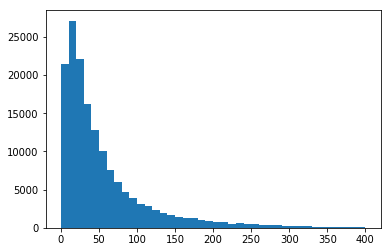

In [0]:
totalNumWords = [len(comment) for comment in X_tokenized_train]
plt.hist(totalNumWords , bins = np.arange(0,410,10))
plt.show()

### We see the most of the comment length lies in between 20-50 words and very few words have more than 150.
So we can make all the comment lengths to 200 by adding 0 to all the comments having less than 200 words and removing few words in those comments which has more than 200 words.

In [0]:
max_len = 200
X_tr = pad_sequences(X_tokenized_train , maxlen = max_len , value = 0.0)
x_train, x_test, y_train, y_test = train_test_split(X_tr, y, 
test_size= 0.1, random_state=0)

# BUILDING OUR MODEL

In [0]:
inp = Input(shape=(max_len, ))

W0822 16:41:20.553296 139845253306240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 16:41:20.601930 139845253306240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



## STEP 1 : EMBEDDING
This step is used to map the words into a defined vector space depending on the distance of the surrounding words in a sentence.

For example take these two sentences :
Sentence 1 : The cat purs.
Sentence 2 : The kitty hunts mice.

When we map it into a vector space the cat and the kitty will have very less between them indicating that they have very similar meaning.It learns via the context given.

In [0]:
embed_size = 128 #Size of the defined vector space
x = Embedding( max_features , embed_size)(inp)

W0822 16:46:38.176292 139845253306240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## STEP 2 : LSTM/RNN - Long Short Term Memory

The Recurrent Neural Network works by feeding the output of a previous network into the input of current network and we will get the output after 'X' number of iterations.

We can make use of the output from the previous embedding layer which outputs a 3-D tensor of (None, 200, 128) into the LSTM layer. What it does is going through the samples, recursively run the LSTM model for 200 times, passing in the coordinates of the words each time. And because we want the unrolled version, we will receive a Tensor shape of (None, 200, 60), where 60 is the output dimension we have defined.

In [0]:
x = LSTM(60 , return_sequences = True , name = "lstm_layer")(x)

## STEP 3 : MAX-POOLING

Now the current 3D Tensor has a shape of (None , 200 , 60) after the LSTM process. We need to convert this 3D tensor into an 2D tensor.  We reshape carefully to avoid throwing away data that is important to us.

We can use differnt methods of pooling but for this data I am going to GlobalMaxPooling.

In [0]:
x = GlobalMaxPool1D()(x)

## DROPOUT AND DENSE

With a 2D Tensor in our hands, we pass it to a Dropout layer which indiscriminately "disable" some nodes so that the nodes in the next layer is forced to handle the representation of the missing data and the whole network could result in better generalization.

We connect the output of dropout layer to RELU function , which basically 

**Activation( (Input X Weights) + Bias)**

In [0]:
x = Dropout(0.1)(x)

W0822 17:41:40.683838 139845253306240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0822 17:41:40.714876 139845253306240 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
x = Dense(50 , activation = "relu")(x)

In [0]:
x = Dropout(0.1)(x)

Finally, we feed the output into a Sigmoid layer. The reason why sigmoid is used is because we are trying to achieve a binary classification(1,0) for each of the 6 labels, and the sigmoid function will squash the output between the bounds of 0 and 1.

In [0]:
x = Dense(6 , activation = "sigmoid")(x)

In [0]:
Now we train the model

In [0]:
model = Model(inputs = inp , outputs = x)
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

W0822 17:58:27.320692 139845253306240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 17:58:27.353759 139845253306240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0822 17:58:27.360937 139845253306240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


We'll feed in a list of 32 padded, indexed sentence for each batch and split 10% of the data as a validation set. This validation set will be used to assess whether the model has overfitted, for each batch.

In [0]:
batch_size = 32
epochs = 2
model.fit(x_train , y_train , batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 129251 samples, validate on 14362 samples
Epoch 1/2
129251/129251 [==============================] - 904s 7ms/step - loss: 0.0400 - acc: 0.9845 - val_loss: 0.0395 - val_acc: 0.9848
Epoch 2/2
129251/129251 [==============================] - 889s 7ms/step - loss: 0.0348 - acc: 0.9863 - val_loss: 0.0405 - val_acc: 0.9845


Train on 14362 samples, validate on 1596 samples
Epoch 1/2
14362/14362 [==============================] - 100s 7ms/step - loss: 0.0384 - acc: 0.9855 - val_loss: 0.0423 - val_acc: 0.9838
Epoch 2/2
14362/14362 [==============================] - 100s 7ms/step - loss: 0.0301 - acc: 0.9881 - val_loss: 0.0446 - val_acc: 0.9844


In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5) 


In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9207920792079208
